## C-rate and delivery guarantee

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import rc
import matplotlib as mpl

In [2]:
vv2g_150 = pd.read_hdf('crate_guarantee.h5', key = 'value_v2g_150')
vv2g_300 = pd.read_hdf('crate_guarantee.h5', key = 'value_v2g_300')

In [5]:
vv2g_150

50          75          100
1    15.922981   17.897034   19.853875
2    65.712162   67.531210   69.323776
3   110.056814  115.393027  116.453042
4   131.262990  160.435595  163.508116
5   137.002408  189.288327  208.988830
6   137.285604  201.171750  243.331472
7   137.590955  205.639627  259.921229
8   137.594571  206.232777  268.609970
9   137.880183  206.245987  272.035732
10  137.639030  206.243584  273.397042
11  137.545510  206.467903  273.304688
12  137.721514  206.288782  273.704625
13  137.666235  206.565933  273.590311
14  138.086466  207.100730  273.854102
15  138.235723  206.865604  273.883231
16  137.963342  206.752695  274.318462
17  138.011490  206.933874  274.447017
18  137.874054  207.086147  273.784176
19  137.884881  206.805979  273.871211
20  137.534056  206.703955  273.744415

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


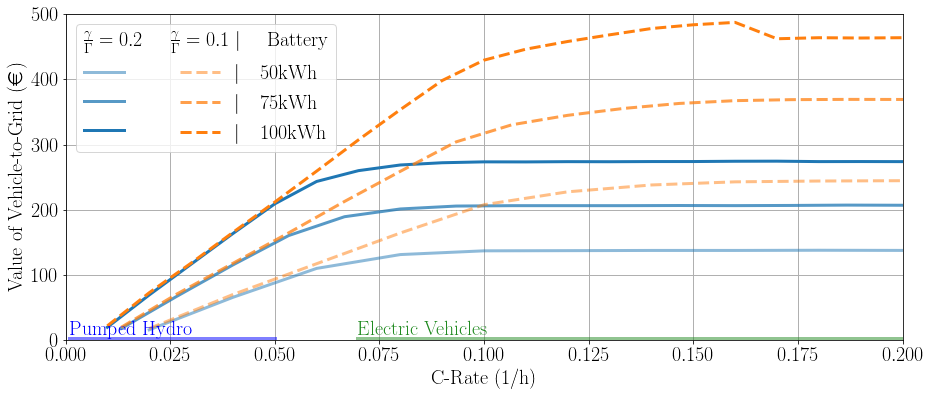

In [3]:
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
fig = plt.figure(figsize=[15, 6])
plt.rcParams.update({'font.size': 20})
plt.rc('text.latex', preamble=r'\usepackage{eurosym}')
# Plot thresholds
ax = plt.gca()
# ax.add_patch(Rectangle((0, 0), 0.08, 270, color="tab:blue", alpha = 0.2))
# ax.add_patch(Rectangle((0, 250), 0.16, 500, color="tab:orange", alpha = 0.2))
for battery in vv2g_150.columns:
    # plt.plot(vv2g_150.index/battery, vv2g_150[battery], '-', color = 'tab:blue', linewidth = 3, alpha = battery/100, label=str(battery)+r'kWh, $\frac{\gamma}{\Gamma} = 0.2$')
    plt.plot(vv2g_150.index/battery, vv2g_150[battery], '-', color = 'tab:blue', linewidth = 3, alpha = battery/100, label=' ')
for battery in vv2g_300.columns:   
    plt.plot(vv2g_300.index/battery, vv2g_300[battery], '--', color = 'tab:orange', linewidth = 3, alpha = battery/100, label=r'$\vert$ \hspace{0.5cm}'+str(battery)+'kWh')
plt.legend(title = r'$\frac{\gamma}{\Gamma} = 0.2$ \hspace{0.507cm} $\frac{\gamma}{\Gamma} = 0.1$ $\vert$ \hspace{0.5cm} Battery', ncol = 2)
# plot technologies
plt.plot([0.001, 0.05], [2, 2], '-', linewidth = 4, alpha = 0.5, color = 'blue')
plt.annotate('Pumped Hydro', (0.001, 6), color = 'blue')
plt.plot([0.07, 0.2], [2, 2], '-', linewidth = 4, alpha = 0.5, color = 'forestgreen')
plt.annotate('Electric Vehicles', (0.07, 6), color = 'forestgreen')
# layout
plt.grid(linewidth = 1)
plt.ylim([0, 500])
plt.xlim([0, 0.20])
# plt.annotate('Power-Constrained', (0.0025, 250), color = 'black')
# plt.annotate('Energy-Constrained', (0.161, 250), color = 'black')
plt.xlabel(r'C-Rate (1/h)')
plt.ylabel(r'Value of Vehicle-to-Grid (\EUR)')
fig.savefig('crate_guarantee.pdf',bbox_inches='tight')